In [1]:
from dotenv import load_dotenv
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import humanize
import pandas as pd
import seaborn as sns
import numpy as np
import pymongo
import warnings
import os

In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.dpi'] = 80
fotmat_tick_humanize = lambda x, pos: humanize.intword(x)

In [3]:
load_dotenv()
warnings.filterwarnings('ignore')

In [4]:
client = pymongo.MongoClient(os.getenv('MONGO_URI'))
db = client[os.getenv('MONGO_DATABASE')]
collection = db['scrapy_bogota_apartments']

df = pd.DataFrame(list(collection.find()))
df = df.drop(columns=['_id'], axis=1)

df.head(3)

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,datetime,website,compañia,imagenes,last_view,fecha_actualizacion_precio_venta,precio_venta_anterior,fecha_actualizacion_precio_arriendo,precio_arriendo_anterior,direccion
0,374-M2718950,APARTAMENTO,VENTA Y ARRIENDO,2.500000e+09,13500000.0,320.0,4.0,5.0,2500000.0,3.0,...,2023-06-19 05:43:49.763,metrocuadrado.com,LIDIS MACIAS,[https://multimedia.metrocuadrado.com/374-M271...,2023-10-11 22:27:12.138,NaT,NaN,NaT,NaN,NaN
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,NaN,84.0,3.0,3.0,680000.0,1.0,...,2023-06-19 05:43:53.411,metrocuadrado.com,JM GESTIONES INMOBILIARIAS,[https://multimedia.metrocuadrado.com/2510-M41...,NaT,NaT,NaN,NaT,NaN,NaN
2,10312-M2873283,APARTAMENTO,VENTA Y ARRIENDO,1.980000e+09,9000000.0,248.0,3.0,3.0,2200000.0,3.0,...,2023-06-19 05:43:58.765,metrocuadrado.com,PENTAGOLD,[https://multimedia.metrocuadrado.com/10312-M2...,2023-10-11 22:26:48.177,NaT,NaN,NaT,NaN,NaN


In [5]:
df.shape

(68859, 31)

In [6]:
df.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'featured_interior', 'featured_exterior',
       'featured_zona_comun', 'featured_sector', 'descripcion', 'datetime',
       'website', 'compañia', 'imagenes', 'last_view',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'direccion'],
      dtype='object')

In [7]:
df.duplicated(subset=['codigo']).sum()

0

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['fecha_actualizacion_precio_venta'] = pd.to_datetime(df['fecha_actualizacion_precio_venta'])
df['fecha_actualizacion_precio_arriendo'] = pd.to_datetime(df['fecha_actualizacion_precio_arriendo'])

In [9]:
# sacar solo el mes de datetime
df['month'] = df['datetime'].dt.month
# cambiar el numero del mes por el nombre
df['month_name'] = df['month'].replace({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio',
                                   7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})

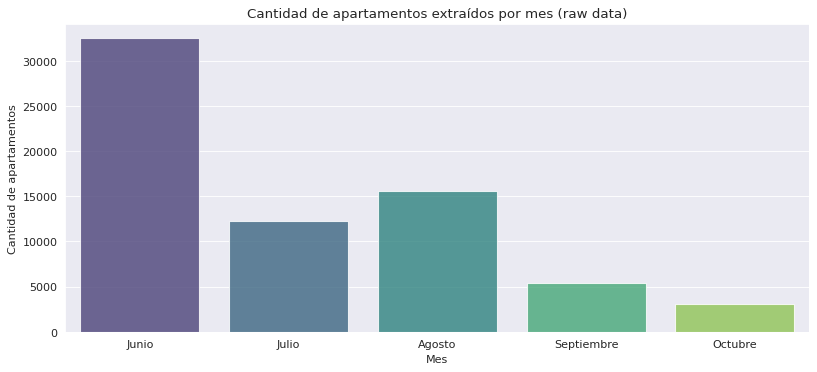

In [10]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='viridis',
    alpha=0.8,
    # edgecolor='black',
    # linewidth=.6
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

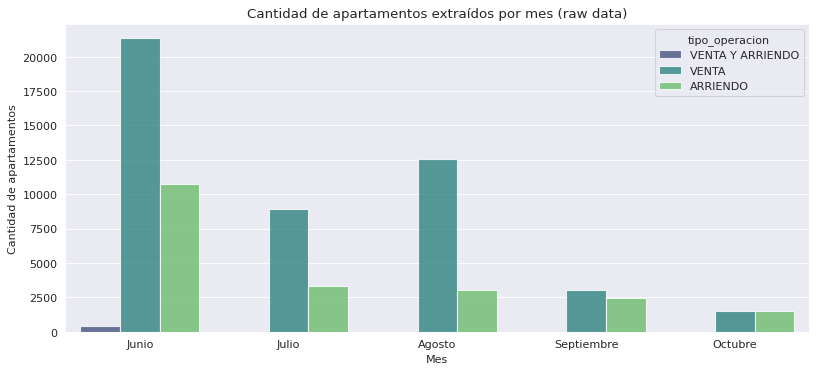

In [11]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='viridis',
    alpha=0.8,
    hue='tipo_operacion',
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

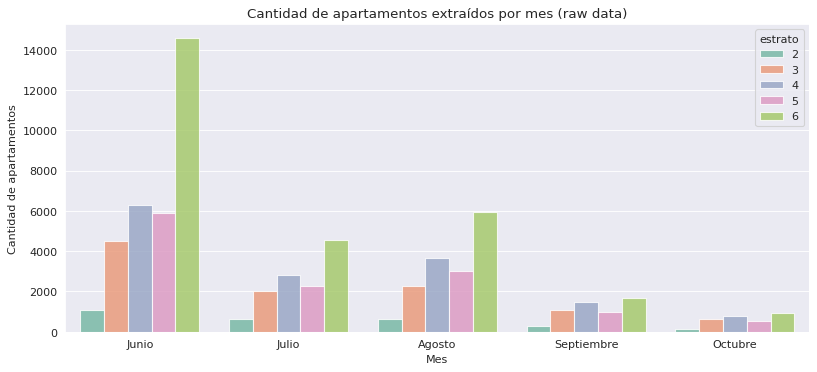

In [12]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='Set2',
    alpha=0.8,
    hue='estrato',
    hue_order=[2, 3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

In [13]:
df['tipo_operacion'].value_counts()

tipo_operacion
VENTA               47321
ARRIENDO            21084
VENTA Y ARRIENDO      436
Name: count, dtype: int64

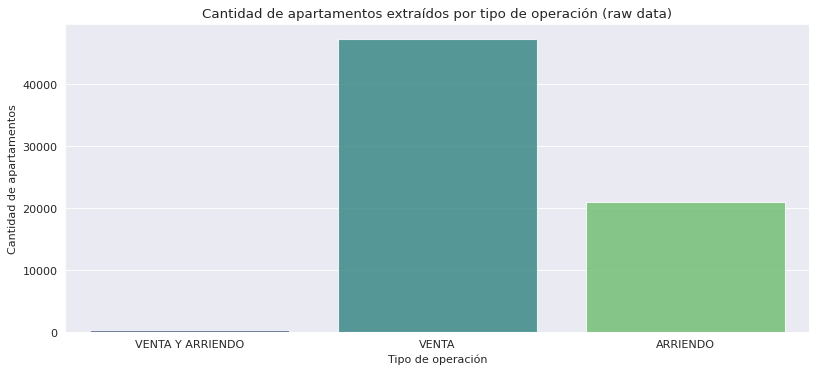

In [14]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='tipo_operacion', 
    data=df, 
    palette='viridis',
    alpha=0.8,
)

plt.title('Cantidad de apartamentos extraídos por tipo de operación (raw data)')
plt.xlabel('Tipo de operación')
plt.ylabel('Cantidad de apartamentos')
plt.show()

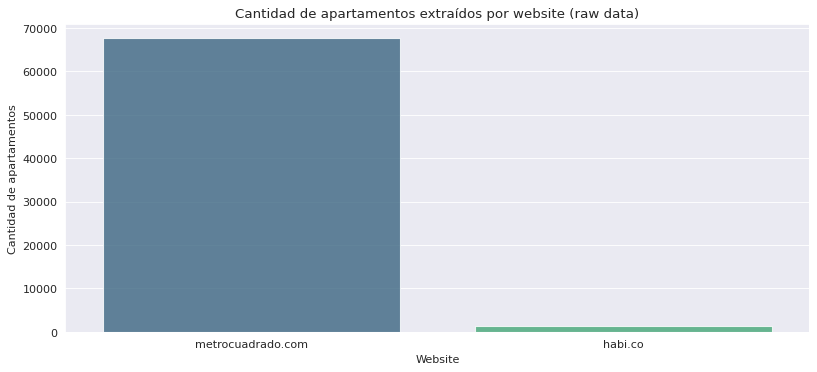

In [18]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='website', 
    data=df, 
    palette='viridis',
    alpha=0.8,
)

plt.title('Cantidad de apartamentos extraídos por website (raw data)')
plt.xlabel('Website')
plt.ylabel('Cantidad de apartamentos')
plt.show()

In [26]:
fig = px.pie(
    df, 
    # values='codigo',
    names='website',
    title='Porcentaje de apartamentos extraídos por website (raw data)',
    # color_discrete_sequence=px.colors.sequential.RdBu,
    template='plotly_dark',

)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

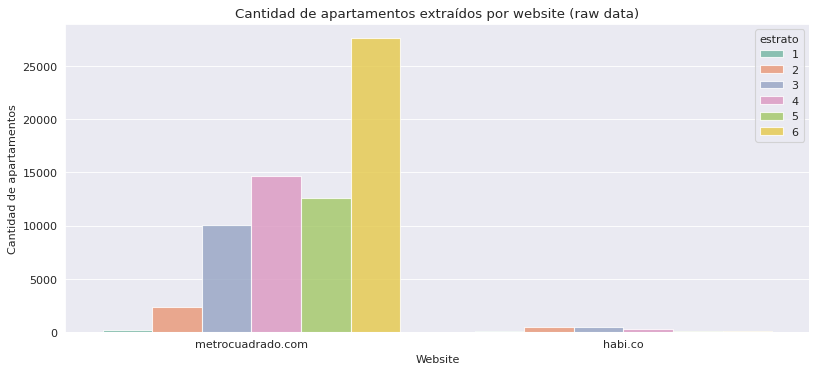

In [30]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='website', 
    data=df, 
    palette='Set2',
    alpha=0.8,
    hue='estrato',
    hue_order=[1, 2, 3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos extraídos por website (raw data)')
plt.xlabel('Website')
plt.ylabel('Cantidad de apartamentos')
plt.show()

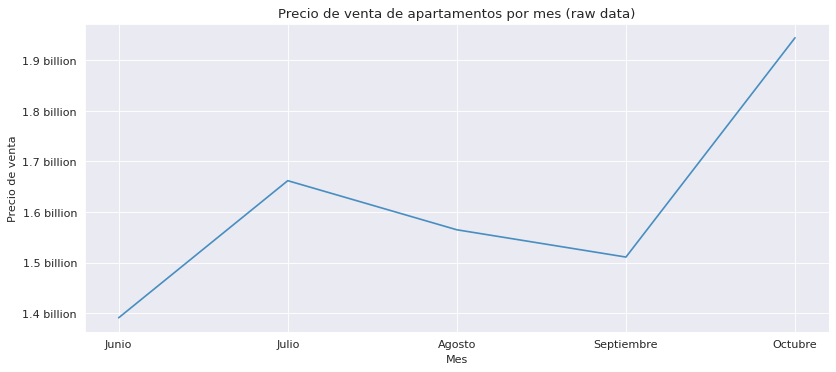

In [15]:
plt.figure(figsize=(12, 5))

sns.lineplot(
    x='month_name', 
    y='precio_venta',
    data=df, 
    palette='Set2',
    alpha=0.8,
    ci=None,
)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.title('Precio de venta de apartamentos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Precio de venta')
plt.show()